# Speech Emotion Recognition

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install kaggle

In [3]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 427M/428M [00:05<00:00, 88.3MB/s]
100% 428M/428M [00:05<00:00, 75.6MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/toronto-emotional-speech-set-tess.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 kaggle.json  'tess toronto emotional speech set data'	 toronto-emotional-speech-set-tess.zip
 sample_data  'TESS Toronto emotional speech set data'


In [7]:
Motion=os.listdir('/content/TESS Toronto emotional speech set data')
Motion

['YAF_disgust',
 'YAF_sad',
 'YAF_angry',
 'OAF_happy',
 'OAF_Fear',
 'OAF_angry',
 'OAF_neutral',
 'YAF_pleasant_surprised',
 'OAF_Sad',
 'OAF_disgust',
 'YAF_happy',
 'OAF_Pleasant_surprise',
 'YAF_neutral',
 'YAF_fear']

In [19]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [20]:
labels[0:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [22]:
len(labels)

2800

In [23]:
paths[0:5]

['/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_keen_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_thin_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_juice_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_beg_disgust.wav',
 '/content/TESS Toronto emotional speech set data/YAF_disgust/YAF_road_disgust.wav']

In [24]:
labels[2796:2800]

['fear', 'fear', 'fear', 'fear']

In [25]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,disgust
1,/content/TESS Toronto emotional speech set dat...,disgust
2,/content/TESS Toronto emotional speech set dat...,disgust
3,/content/TESS Toronto emotional speech set dat...,disgust
4,/content/TESS Toronto emotional speech set dat...,disgust


In [26]:
df['label'].value_counts()


label
disgust    400
sad        400
angry      400
happy      400
fear       400
neutral    400
ps         400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

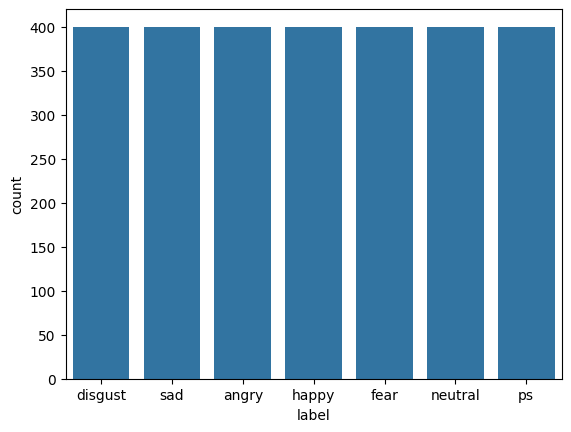

In [27]:
sns.countplot(data=df, x='label')


In [28]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

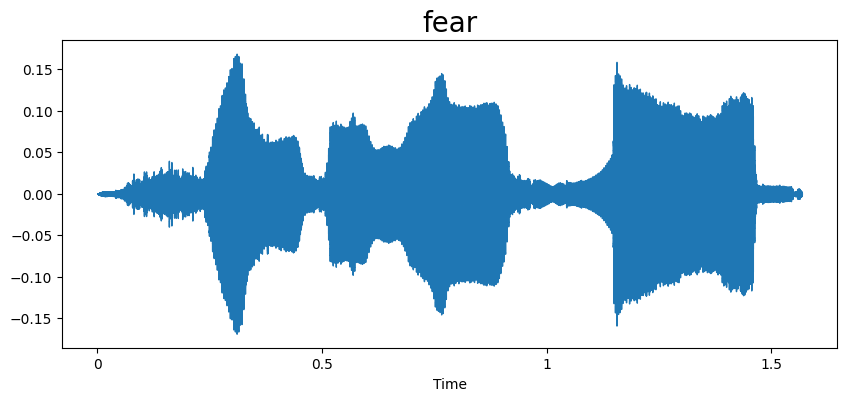

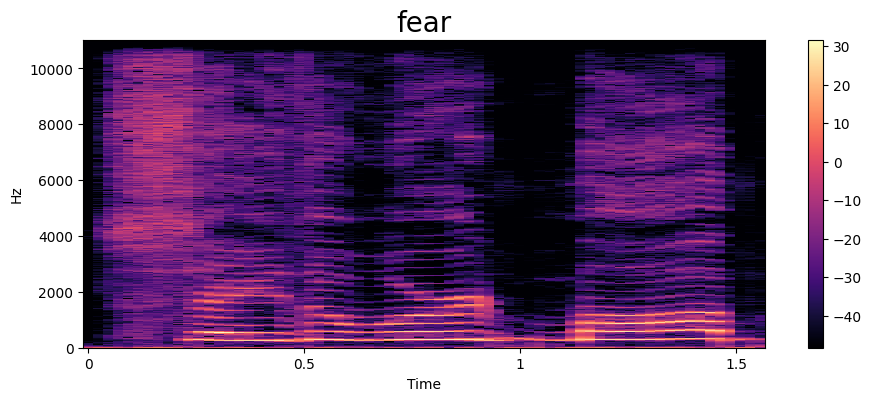

In [29]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

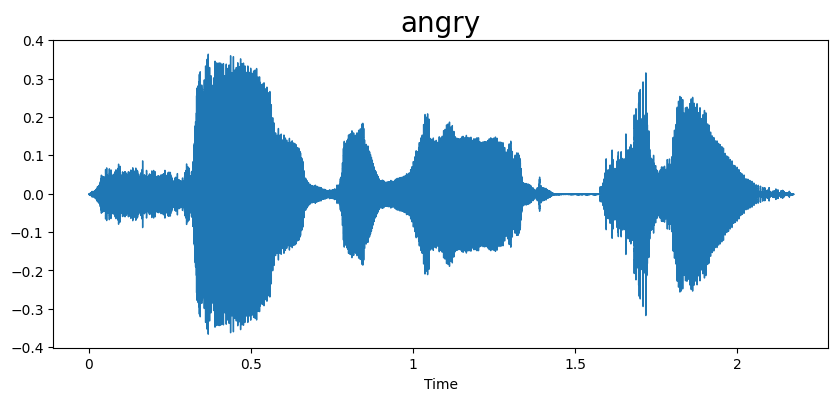

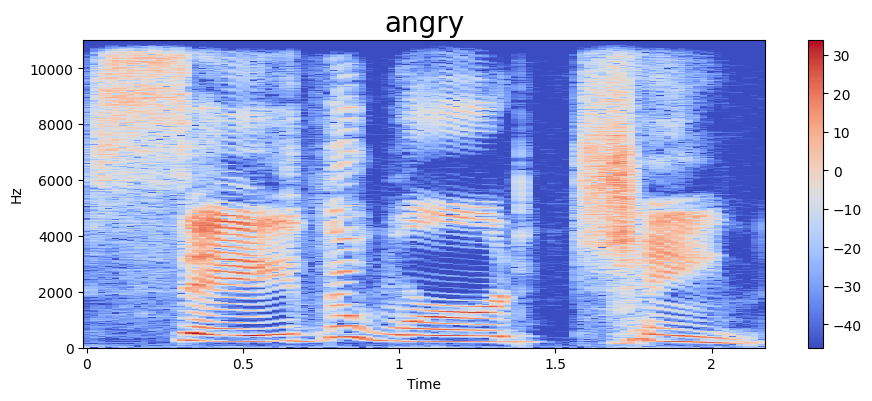

In [30]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

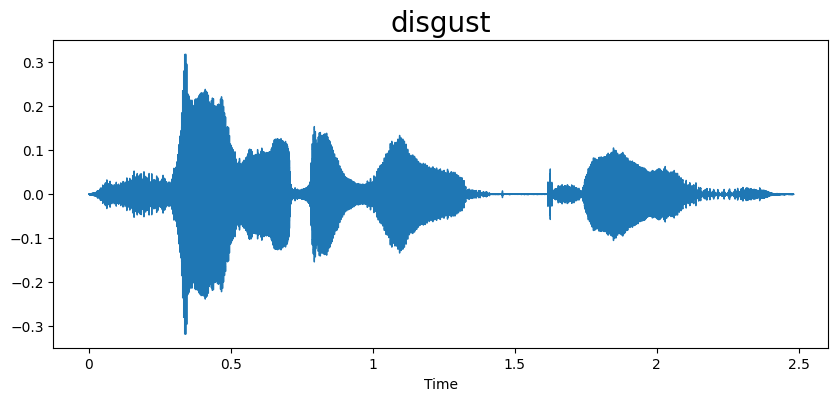

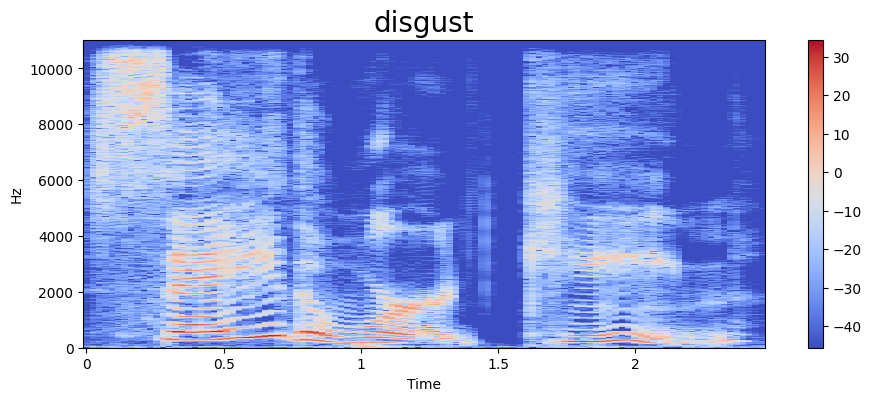

In [31]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

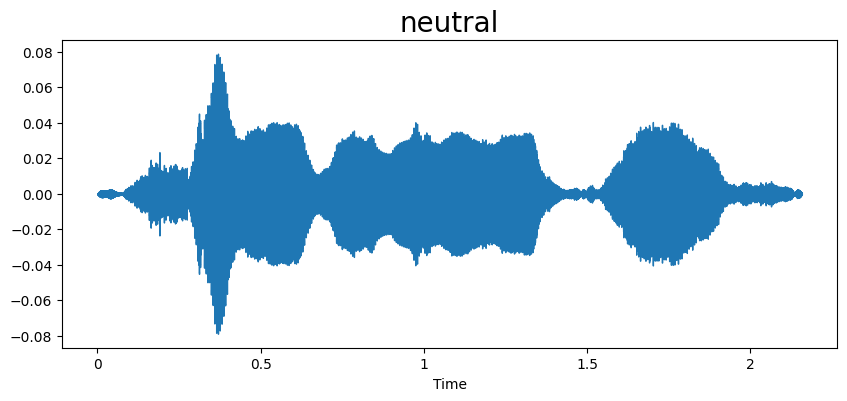

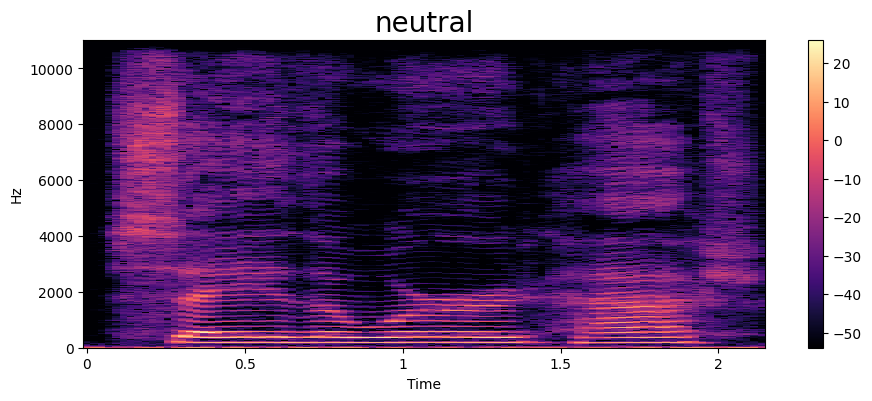

In [32]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

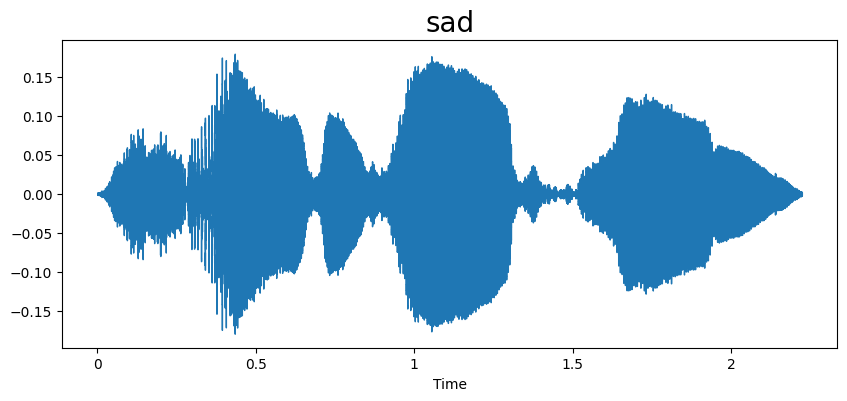

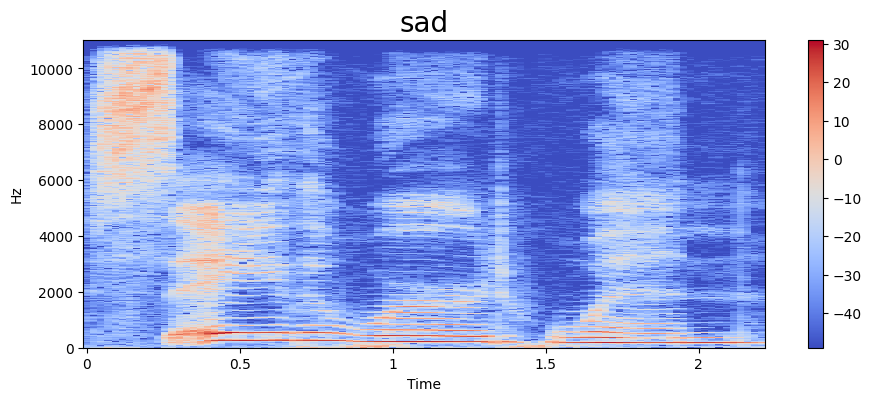

In [33]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

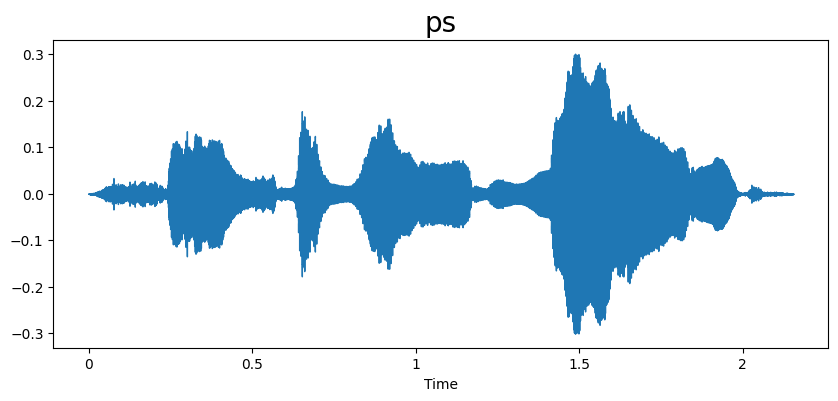

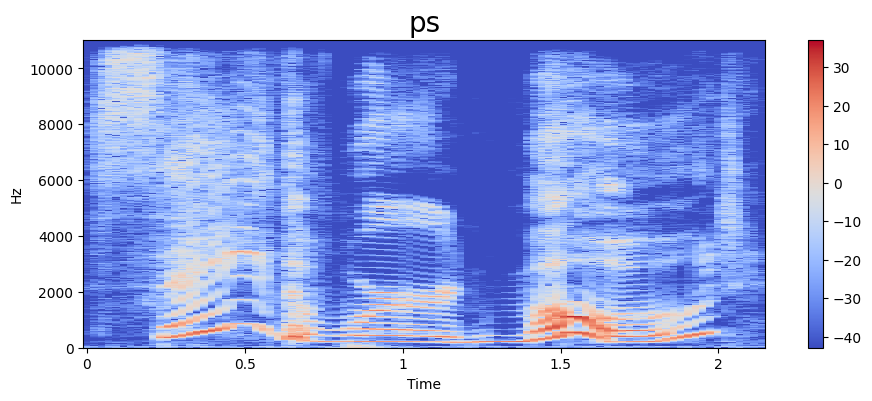

In [34]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

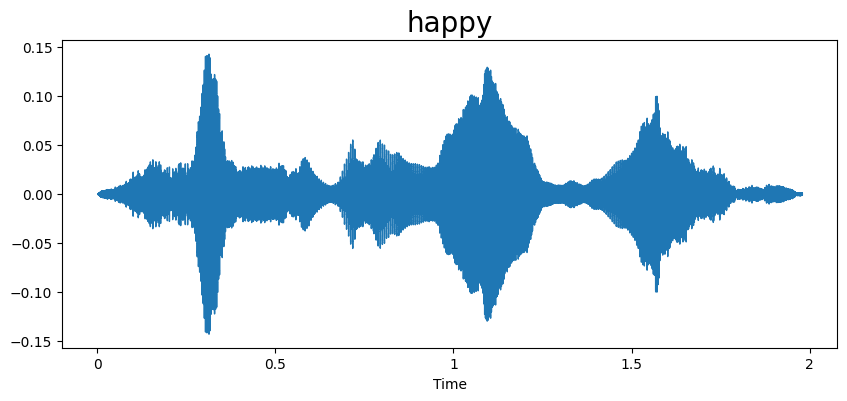

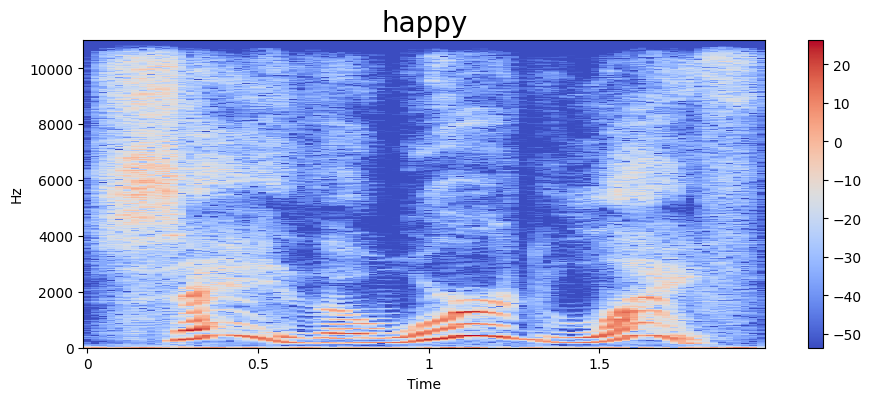

In [35]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [36]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [37]:
extract_mfcc(df['speech'][0])


array([-4.1966891e+02,  8.4419693e+01, -1.2986053e+00,  2.7986095e+01,
       -3.3776464e+00, -8.7849587e-01, -6.1376534e+00, -2.1790682e+01,
       -1.5712830e+01,  2.7034515e-01, -8.2364225e+00, -5.7580156e+00,
       -8.6923027e+00,  5.4794824e-01, -2.2636566e+00, -2.8572619e+00,
        5.2540560e+00,  4.1241762e-01, -4.3724146e+00,  2.4384255e+00,
       -4.7555752e+00, -5.3043361e+00, -4.4036031e+00, -7.5323129e-01,
       -5.4563254e-01,  2.5449653e+00,  6.2405670e-01,  3.9748435e+00,
       -1.3259317e-01,  3.8274658e+00, -8.6253846e-01,  5.8868413e+00,
        2.4883840e+00,  2.7040396e+00,  3.9912450e+00,  2.1974893e+00,
        4.7061567e+00,  4.4663620e+00,  3.4545600e+00,  2.9962924e+00],
      dtype=float32)

In [38]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [39]:
X_mfcc

0       [-419.6689, 84.41969, -1.2986053, 27.986095, -...
1       [-423.19373, 94.5416, -1.5288799, 29.158123, -...
2       [-419.32684, 55.51554, 6.406949, 20.166203, -2...
3       [-438.90717, 97.849, -0.77856964, 23.97193, -6...
4       [-428.31503, 122.406105, -6.519919, 12.2533455...
                              ...                        
2795    [-257.68256, 39.546734, -12.162491, 15.057019,...
2796    [-316.30478, 65.10755, -22.675829, 9.391171, -...
2797    [-288.86093, 38.405865, -14.762198, 1.9164615,...
2798    [-315.2486, 46.854088, -31.067015, 5.5994425, ...
2799    [-322.26993, 50.305977, -21.660658, 17.201435,...
Name: speech, Length: 2800, dtype: object

In [40]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [41]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [43]:
y = y.toarray()


In [44]:
y.shape

(2800, 7)

## Creating LSTM Model

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
# build the model

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                

In [58]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 10s 211ms/step - loss: 1.3194 - accuracy: 0.4768 - val_loss: 1.1443 - val_accuracy: 0.6661
Epoch 2/50
35/35 [==============================] - 8s 221ms/step - loss: 0.5629 - accuracy: 0.7937 - val_loss: 0.5678 - val_accuracy: 0.7446
Epoch 3/50
35/35 [==============================] - 7s 206ms/step - loss: 0.3396 - accuracy: 0.8830 - val_loss: 0.8025 - val_accuracy: 0.6625
Epoch 4/50
35/35 [==============================] - 8s 226ms/step - loss: 0.2274 - accuracy: 0.9295 - val_loss: 0.7380 - val_accuracy: 0.7321
Epoch 5/50
35/35 [==============================] - 8s 230ms/step - loss: 0.1860 - accuracy: 0.9415 - val_loss: 0.8780 - val_accuracy: 0.6946
Epoch 6/50
35/35 [==============================] - 7s 187ms/step - loss: 0.1733 - accuracy: 0.9513 - val_loss: 0.7497 - val_accuracy: 0.7250
Epoch 7/50
35/35 [==============================] - 10s 282ms/step - loss: 0.1239 - accuracy: 0.9616 - val_loss: 0.6359 - val_accuracy: 0.7732
Epoc

## Plotting Graph

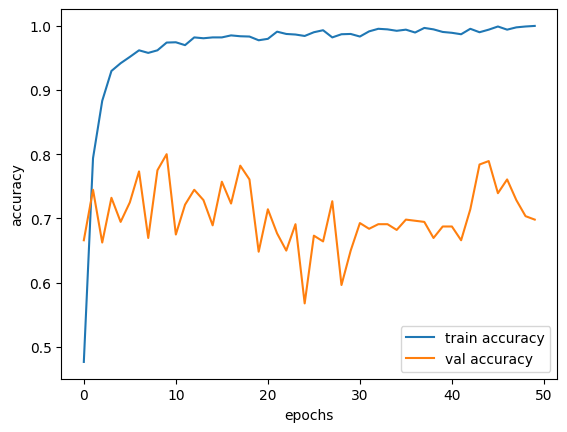

In [59]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

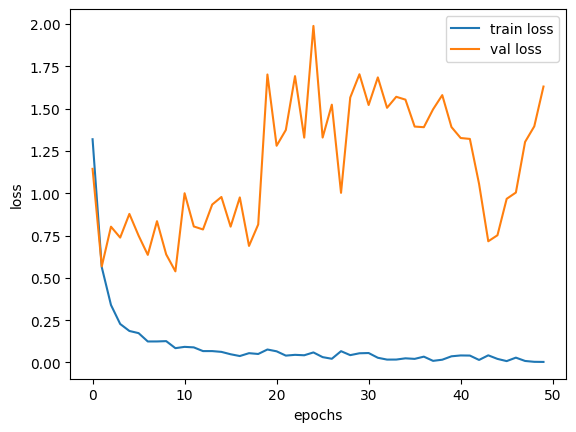

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()